In [1]:
from collections import Counter
from rdkit import Chem
import pandas as pd
import os

In [2]:
compound_info = pd.read_csv("../data/chembl_processed/compound_info.csv")
compound_info_standardized = pd.read_csv("../data/chembl_processed/compound_info_standardized.csv")
compound_info["standardized_smiles"] = compound_info_standardized['standardized_smiles']
compound_info["standardized_MW"] = compound_info_standardized['standardized_MW']
len(compound_info)

2854815

In [3]:
print(len(compound_info[compound_info['canonical_smiles'].isna()]))
print(len(compound_info[compound_info['standardized_smiles'].isna()]))

0
19


In [4]:
print(len(compound_info[compound_info['MW'].isna()]))
print(len(compound_info[compound_info['standardized_MW'].isna()]))

1
19


In [5]:
compound_info = compound_info[(compound_info['standardized_smiles'].isna() == False) & 
                              (compound_info['standardized_MW'].isna() == False)].reset_index(drop=True)

In [6]:
len(compound_info)

2854796

In [7]:
Counter(compound_info['canonical_smiles'] == compound_info['standardized_smiles'])

Counter({True: 2735464, False: 119332})

In [8]:
Counter(compound_info['MW'] == compound_info['standardized_MW'])

Counter({True: 2735626, False: 119170})

In [8]:
Counter(compound_info['MW'] < compound_info['standardized_MW'])

Counter({False: 2853256, True: 1540})

In [9]:
Counter(compound_info['MW'] > compound_info['standardized_MW'])

Counter({False: 2737166, True: 117630})

In [11]:
compound_info['MW_difference'] = [i-j for i,j in compound_info[['MW', 'standardized_MW']].values]

In [16]:
compound_info.sort_values('MW_difference', ascending=False)[-1:].values

array([[1376258,
        'InChI=1S/C57H98I6O6/c1-4-7-10-13-19-28-37-49(58)52(61)40-31-22-16-25-34-43-55(64)67-46-48(69-57(66)45-36-27-18-24-33-42-54(63)51(60)39-30-21-15-12-9-6-3)47-68-56(65)44-35-26-17-23-32-41-53(62)50(59)38-29-20-14-11-8-5-2/h48H,4-47H2,1-3H3/b52-49-,53-50-,54-51-/i58-2,59-2,60-2,61-2,62-2,63-2',
        'XXHRJPJFJANRFG-PUCGBOPISA-N',
        'CCCCCCCC/C([125I])=C(/[125I])CCCCCCCC(=O)OCC(COC(=O)CCCCCCC/C([125I])=C(/[125I])CCCCCCCC)OC(=O)CCCCCCC/C([125I])=C(/[125I])CCCCCCCC',
        'CHEMBL2103988', 1628.833,
        'CCCCCCCC/C(I)=C(/I)CCCCCCCC(=O)OCC(COC(=O)CCCCCCC/C(I)=C(/I)CCCCCCCC)OC(=O)CCCCCCC/C(I)=C(/I)CCCCCCCC',
        1640.829, -11.995999999999867]], dtype=object)

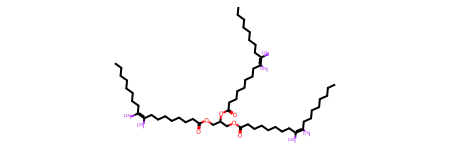

In [17]:
Chem.MolFromSmiles('CCCCCCCC/C([125I])=C(/[125I])CCCCCCCC(=O)OCC(COC(=O)CCCCCCC/C([125I])=C(/[125I])CCCCCCCC)OC(=O)CCCCCCC/C([125I])=C(/[125I])CCCCCCCC')

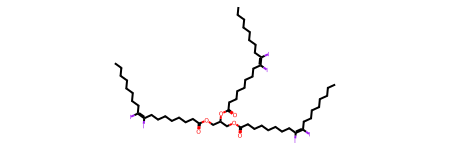

In [18]:
Chem.MolFromSmiles("CCCCCCCC/C(I)=C(/I)CCCCCCCC(=O)OCC(COC(=O)CCCCCCC/C(I)=C(/I)CCCCCCCC)OC(=O)CCCCCCC/C(I)=C(/I)CCCCCCCC")

In [41]:
import matplotlib.pyplot as plt
plt.rcParamsDefault['figure.dpi'] = 300

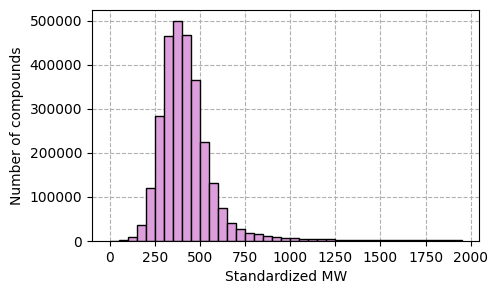

In [43]:
plt.figure(figsize=(5,3))
plt.hist(compound_info['standardized_MW'], bins=[i for i in range(0, 2000, 50)], edgecolor='k', zorder=2, color='#DC9FDC')
plt.xlabel("Standardized MW")
plt.ylabel("Number of compounds")
plt.grid(linestyle='--', zorder=-2)
plt.show()